### Full data query approach

Here we will look at getting the full data queries for the boardex and the patent data, and link everything together.

Do this tomorrow, for approach.

Create the SQL query.

In [1]:
def concatenate_to_literal(strings: str):
    """
    Useful function to convert to a string literal
    """

    # Convert each string in the list to be surrounded by single quotes
    quoted_strings = [f"'{s}'" for s in strings]

    # Join the quoted strings with a comma and space
    joined_strings = ', '.join(quoted_strings)
    
    # Format the joined strings within parentheses
    result = f"({joined_strings})"

    return result

##### Patent data exploration

Just search the patent data 

In [2]:
import pandas as pd
import numpy as np

In [3]:
import wrds

conn = wrds.Connection()

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [4]:
# conn.list_libraries().sort()
# conn.list_libraries()

In [5]:
# conn.list_tables(library= 'wrdsapps')

Data sources

1. Boardex
1. Compustat
1. Annual Report
1. US Patent

### 0. Get all Companies by SIC code - Source of linking companies COMES FROM COMPUTSTAT!!

Remember this methodology!!

Run existing query and save it here locally, 2779 here, but you get a lot more - check what's going on!!

First of all use `comp_na_daily_all` as you get more companies!!

In [6]:
# get all use companies

conn.raw_sql("""select count(distinct gvkey)
                        from comp_na_annual_all.company cp
                where cp.sic in ('8731', '8733', '2833', '2834', '2835', '2836') and cp.loc = 'USA'
             limit 5;
              """) 

,count
0,2085


In [7]:
conn.raw_sql("""select count(distinct gvkey)
                        from comp_na_daily_all.company cp
                where cp.sic in ('8731', '8733', '2833', '2834', '2835', '2836') and cp.loc = 'USA'
             limit 5;
              """) # code was commented out - so that is was the error!!

# still see that you get more with daily company so use that

# for graphs probably because it is looking at companies outside as well. - so choose that!!

,count
0,2161


Why are there fewer companies than previously listed above? Shadow entries counted?

In [8]:
# conn.raw_sql("""select distinct gvkey
#                         from comp_na_daily_all.company cp
#                 where cp.sic in ('8731', '8733', '2833', '2834', '2835', '2836') and cp.loc = 'USA';
#               """)

Get Company list here

In [9]:
company_list_df_us = conn.raw_sql("""select *
                        from comp_na_daily_all.company cp
                where cp.sic in ('8731', '8733', '2833', '2834', '2835', '2836') and cp.loc = 'USA';
              """)
company_list_df_us

,conm,gvkey,add1,add2,add3,add4,addzip,busdesc,cik,city,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,ALPHARMA INC -CL A,001034,"440 Route 22 East, P.O. Box 1399",None,None,None,08807,"Alpharma, LLC manufactures and markets pharmac...",0000730469,Bridgewater,...,01,2834,283.0,905.0,B-,NJ,0.0,None,2008-12-31,None
1,ALCON LABORATORIES INC,001248,6201 South Freeway,None,None,None,76134-2001,"Alcon Laboratories, Inc. develops and manufact...",0000003382,Fort Worth,...,01,2834,285.0,905.0,None,TX,0.0,www.alcon.com,1978-01-31,None
2,TAMIR BIOTHECHNOLOGY INC,001259,"51 JFK Parkway, 1st Floor West, Suite 108",None,None,None,07078,"Tamir Biotechnology, Inc., a biopharmaceutical...",0000708717,Short Hills,...,01,2836,147.0,905.0,C,NJ,3.0,tamirbio.com,2013-06-20,None
3,ALLERGAN PHARMACEUTICALS INC,001284,2525 DUPONT DRIVE,None,None,None,92713,None,0000215038,IRVINE,...,01,2834,285.0,905.0,None,CA,0.0,None,1980-04-30,None
4,ALZA CORP,001359,700 Eubanks Drive,None,None,None,95688-9470,"ALZA Corporation, a pharmaceutical research an...",0000004310,Vacaville,...,01,2834,283.0,905.0,None,CA,0.0,www.alza.com,2001-06-25,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,ARMATA PHARMACEUTICALS INC,332115,5005 McConnell Avenue,None,None,None,90066,"Armata Pharmaceuticals, Inc., a clinical-stage...",0000921114,Los Angeles,...,01,2836,NaN,NaN,None,CA,0.0,www.armatapharma.com,None,None
2157,IMMUNITYBIO INC,347007,3530 John Hopkins Court,None,None,None,92121,"ImmunityBio, Inc., a clinical-stage biotechnol...",0001326110,San Diego,...,01,2836,NaN,NaN,None,CA,0.0,immunitybio.com,None,None
2158,INDAPTUS THERAPEUTICS INC,349972,"Three Columbus Circle, 15th Floor",None,None,None,10019,"Indaptus Therapeutics, Inc., a clinical biotec...",0001857044,New York,...,01,2836,NaN,NaN,None,NY,0.0,indaptusrx.com,None,None
2159,IRWIN NATURALS INC,350741,5310 Beethoven Street,None,None,None,90066,"Irwin Naturals, Inc. engages in the developmen...",None,Los Angeles,...,01,2833,NaN,NaN,None,CA,3.0,www.irwinnaturals.com,None,None


In [10]:
company_list_df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   conm      2161 non-null   object 
 1   gvkey     2161 non-null   object 
 2   add1      2149 non-null   object 
 3   add2      6 non-null      object 
 4   add3      1 non-null      object 
 5   add4      1 non-null      object 
 6   addzip    2150 non-null   object 
 7   busdesc   2110 non-null   object 
 8   cik       1956 non-null   object 
 9   city      2150 non-null   object 
 10  conml     2161 non-null   object 
 11  costat    2161 non-null   object 
 12  county    53 non-null     object 
 13  dlrsn     1202 non-null   object 
 14  ein       1934 non-null   object 
 15  fax       816 non-null    object 
 16  fic       2161 non-null   object 
 17  fyrc      2161 non-null   int64  
 18  ggroup    2113 non-null   object 
 19  gind      2113 non-null   object 
 20  gsector   2113 non-null   obje

Confirmed that there are 2161 companies for review.

### 1. Get computatstat

Based on GVkey annual fundamental - check the tables again to see whether we can get it from SQL Queries, strange that we cannot before.

Using the daily result

In [11]:
compustat_funda_df = conn.raw_sql("""select fa.*
                        from comp_na_daily_all.funda fa
                        inner join comp_na_daily_all.company as cp
                        on fa.gvkey = cp.gvkey
                where cp.sic in ('8731', '8733', '2833', '2834', '2835', '2836') and cp.loc = 'USA';
              """)

In [12]:
compustat_funda_df.shape, compustat_funda_df["fyear"].min() , compustat_funda_df["fyear"].max()

# can filter by more years later.

((40056, 948), 1950.0, 2023.0)

In [13]:
compustat_funda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40056 entries, 0 to 40055
Columns: 948 entries, gvkey to cfoso
dtypes: float64(487), int64(1), object(460)
memory usage: 289.7+ MB


In [14]:
compustat_funda_df.gvkey.drop_duplicates().shape

(1967,)

Here we see that we get 1967 out of 2161 available. 

**We will use these to the main list to get everything, from the directory from Compustat to link to Boardex, Patent, and Annual reports.**

This is because we have no sector data from Boardex data alone - and has to be matched from Compustat data!!

Get GVKey to boardex data

In [15]:
us_gvkey = company_list_df_us["gvkey"].drop_duplicates().to_list()

len(us_gvkey) # 

2161

Gvkey to SIC code

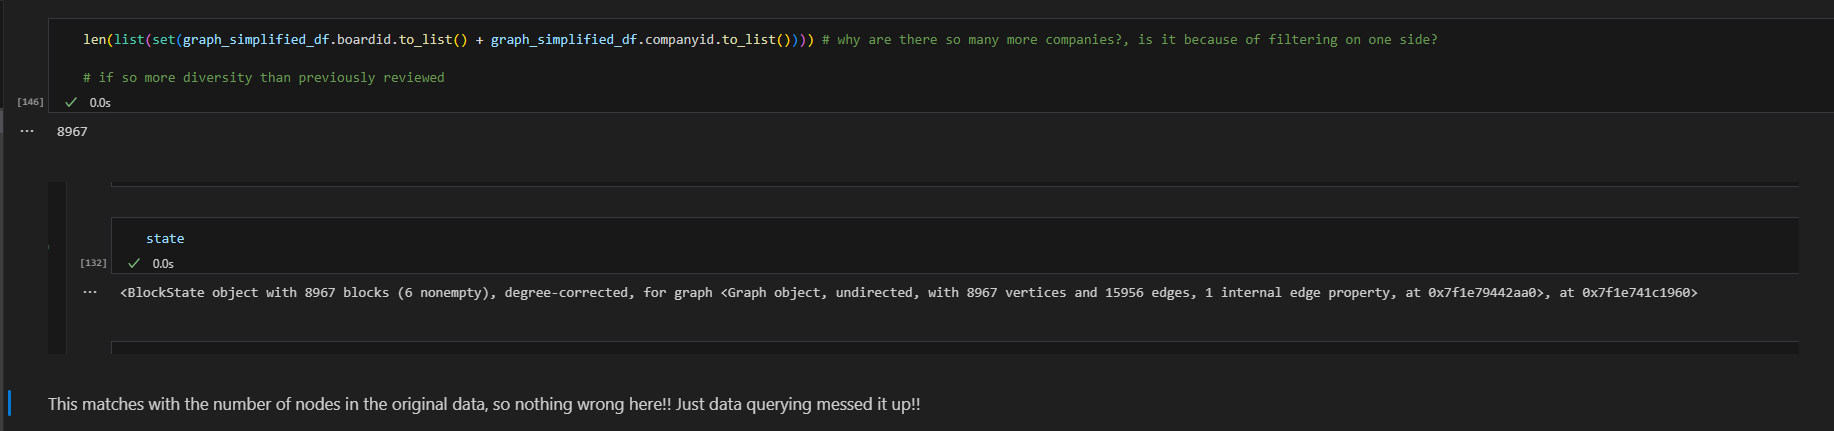

Check the graph data query issue here.

Link everything before Boardex data

### 2. Boardex - Get all Boardex data based on id

1. Use the SIC code from before for this, for the graph, checking whether in boardid or company id to get everything - so not that sparse (probably another issue previously)

2. Also filter by the years

Do same for both types of graph data, name each as definitively.

Using this table

https://wrds-www.wharton.upenn.edu/pages/get-data/linking-suite-wrds/boardex-crsp-compustat-link/

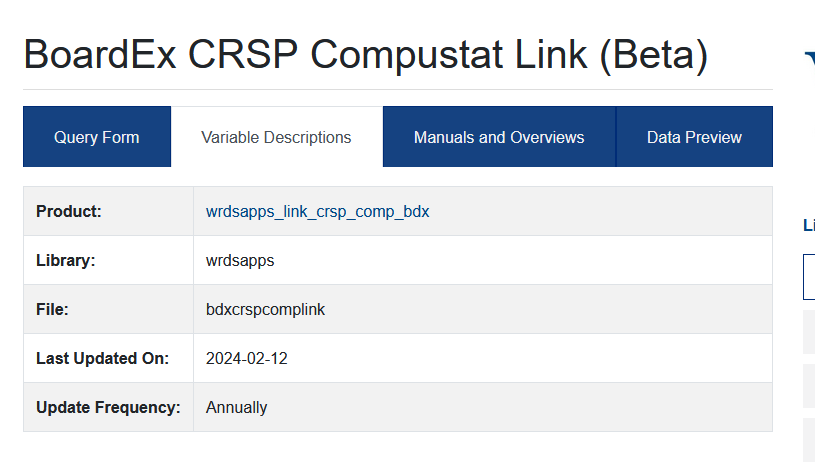

**Here we get the Boardex ids to work within the Boardex ecosystem (same with the other data ids)**

In [16]:
conn.raw_sql(f"""
            select count(distinct gvkey)
            from wrdsapps_link_crsp_comp_bdx.bdxcrspcomplink bl
            where bl.gvkey in {concatenate_to_literal(us_gvkey)};
              """) # link relevant sql here in this way - since everything is in postgres as discussed

,count
0,1262


Here we get 1,322 companies (with duplicates) in the Biopharmaceutical sector.

After accounting for duplicates as seen above, we have 1,262 companies instead. 

**Problem - check the graph creation of the data later!!**

Probably due to connections outside that's it, need to justify this approach properly!!

In [17]:
boardex_us_metadata_df =  conn.raw_sql(f"""
    select *
    from wrdsapps_link_crsp_comp_bdx.bdxcrspcomplink bl
    where bl.gvkey in {concatenate_to_literal(us_gvkey)};
""") 

In [18]:
boardex_us_metadata_df.shape

(1322, 6)

In [19]:
boardex_us_metadata_df.head()

,permco,gvkey,companyid,score,preferred,duplicate
0,35,001259,1362.0,3.0,1.0,0.0
1,216,001602,2068.0,1.0,1.0,0.0
2,250,007799,21659.0,1.0,1.0,1.0
3,250,007799,1651568.0,1.0,1.0,1.0
4,887,012713,584.0,6.0,1.0,1.0


In [20]:
boardex_us_metadata_df["gvkey"].drop_duplicates().shape

(1262,)

**Watch out for the Duplicate data here - as seen in the above for analysis**

And also for final feature regression workflows

**Get the boardex id for Boardex eco-system**

N.b. even though they are duplicates it is still useful to look at the interactions in a hierarchical manner.

In [21]:
# get boardex id for use to get relevent boardex information.
us_company_id_boardex = boardex_us_metadata_df["companyid"].drop_duplicates().to_list()


Next we get the Company and Director Interlocks network data as each represents a different interlock so we will create a graph for each network.

In [22]:
import networkx as nx

IMPORTANT 

For the approaches below save the list of gvkey from Compustat saved from `us_gvkey_boardex`.

### 3.1. Boardex - Get Company Interlock Graph data

Graph data is complex - so query can take a long time!!

In [23]:
id_list = ', '.join(map(str, us_company_id_boardex))

id_list

'1362.0, 2068.0, 21659.0, 1651568.0, 584.0, 2179515.0, 6544.0, 23530.0, 3350556.0, 887375.0, 13028.0, 15541.0, 1080048.0, 18255.0, 3299324.0, 21450.0, 2514597.0, 27939.0, 28863.0, 2068654.0, 32106.0, 32726.0, 13091.0, 9152.0, 20514.0, 13104.0, 21700.0, 1665695.0, 4336.0, 22600.0, 18728.0, 6728.0, 24331.0, 5897.0, 1147470.0, 550617.0, 15436.0, 7864.0, 2305769.0, 11441.0, 4861.0, 15684.0, 6162.0, 24317.0, 8540.0, 10842.0, 1465.0, 1025551.0, 24899.0, 19393.0, 1096436.0, 6209.0, 17161.0, 21519.0, 15676.0, 622034.0, 2622265.0, 23440.0, 26081.0, 3176.0, 13116.0, 33873.0, 874.0, 8551.0, 26103.0, 20311.0, 22732.0, 8472.0, 8557.0, 23317.0, 18617.0, 25955.0, 15675.0, 3607.0, 10634.0, 2578208.0, 6177.0, 31732.0, 2304.0, 2037610.0, 21652.0, 5587.0, 80044.0, 16904.0, 4027.0, 1228.0, 3269516.0, 59962.0, 7355.0, 24165.0, 21768.0, 22595.0, 2326096.0, 1224952.0, 30123.0, 10551.0, 590430.0, 7962.0, 21756.0, 21930.0, 34132.0, 15683.0, 8339.0, 246407.0, 577092.0, 20122.0, 23933.0, 15680.0, 485651.0, 2977.

In [24]:
conn.get_table(library='boardex_na', table='na_wrds_company_networks', obs=2)

,associationtype,boardname,companyname,directorname,overlapyearstart,overlapyearend,role,associatedrole,conncompanyorgtype,boardid,...,roletitle,roleboardposition,roleedflag,overlapyearstart_int,overlapyearend_int,startcompanydatestartrole,startcompanydateendrole,conncompanydatestartrole,conncompanydateendrole,orgtype
0,Unlisted Org,1 800 CONTACTS INC (De-listed 09/2007),JD Watkins Enterprises Inc,Steve Key,2006,2007,Independent Director (Brd) (SD),Vice Chairman/COO (Brd) (ED),Private,3.0,...,Independent Director,Brd,SD,2006,2007,2005-07-28,2007-09-07,2006-01-01,None,Quoted
1,Other,1 800 CONTACTS INC (De-listed 09/2007),Rhode Island School of Design (RISD),Steve Key,2006,2007,Independent Director (Brd) (SD),Vice Chairman,Universities,3.0,...,Independent Director,Brd,SD,2006,2007,2005-07-28,2007-09-07,None,None,Quoted


In [25]:
conn.get_table(library='boardex_na', table='na_wrds_company_networks', obs=2).columns

Index(['associationtype', 'boardname', 'companyname', 'directorname',
       'overlapyearstart', 'overlapyearend', 'role', 'associatedrole',
       'conncompanyorgtype', 'boardid', 'companyid', 'directorid', 'roletitle',
       'roleboardposition', 'roleedflag', 'overlapyearstart_int',
       'overlapyearend_int', 'startcompanydatestartrole',
       'startcompanydateendrole', 'conncompanydatestartrole',
       'conncompanydateendrole', 'orgtype'],
      dtype='object')

In [26]:
boardex_company_networks_us_df = conn.raw_sql(
    f"""
    select *
    from boardex_na.na_wrds_company_networks bdn
    where bdn.boardid in {concatenate_to_literal(us_company_id_boardex)} and bdn.companyid in {concatenate_to_literal(us_company_id_boardex)}
    and
    bdn.overlapyearstart_int <= 2024 and (bdn.overlapyearend_int >= 2023 or bdn.overlapyearend_int is null);
    """ # do this to be consistent with everything
)
boardex_company_networks_us_df

,associationtype,boardname,companyname,directorname,overlapyearstart,overlapyearend,role,associatedrole,conncompanyorgtype,boardid,...,roletitle,roleboardposition,roleedflag,overlapyearstart_int,overlapyearend_int,startcompanydatestartrole,startcompanydateendrole,conncompanydatestartrole,conncompanydateendrole,orgtype
0,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,SPERO THERAPEUTICS INC,Doctor Steve Gilman,2017,Curr,Independent Director (Brd) (SD),Scientific Advisor (Non-Brd),Quoted,401.0,...,Independent Director,Brd,SD,2017,NaN,2015-01-06,None,2017-11-02,None,Quoted
1,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,AKEBIA THERAPEUTICS INC,Doctor Steve Gilman,2018,Curr,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,401.0,...,Independent Director,Brd,SD,2018,NaN,2015-01-06,None,2018-12-12,None,Quoted
2,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,CONTRAFECT CORP (De-listed 11/2023),Doctor Steve Gilman,2022,2023,Independent Director (Brd) (SD),Independent Vice Chairman (Brd) (SD),Quoted,401.0,...,Independent Director,Brd,SD,2022,2023.0,2015-01-06,None,2022-01-01,2023-11-09,Quoted
3,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,SCYNEXIS INC,Doctor Steve Gilman,2015,Curr,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,401.0,...,Independent Director,Brd,SD,2015,NaN,2015-01-06,None,2015-02-25,None,Quoted
4,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,TREVI THERAPEUTICS INC,Nick Colangelo,2020,Curr,President/CEO (Brd) (ED),Independent Director (Brd) (SD),Quoted,401.0,...,President/CEO,Brd,ED,2020,NaN,2014-05-07,None,2020-06-29,None,Quoted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,Listed Org,LEXEO THERAPEUTICS INC,IONIS PHARMACEUTICALS INC (Isis Pharmaceutical...,Doctor Eric Adler,2024,Curr,Chief Medical Officer/Head of Division (Non-Brd),Advisory Board Member (Non-Brd),Quoted,3698691.0,...,Chief Medical Officer/Head of Division,Non-Brd,None,2024,NaN,2024-02-05,None,None,None,Quoted
9652,Listed Org,LEXEO THERAPEUTICS INC,IONIS PHARMACEUTICALS INC (Isis Pharmaceutical...,Doctor Eric Adler,2023,2024,Chief Scientific Officer (Non-Brd),Advisory Board Member (Non-Brd),Quoted,3698691.0,...,Chief Scientific Officer,Non-Brd,None,2023,2024.0,2023-11-03,2024-02-05,None,None,Quoted
9653,Listed Org,LEXEO THERAPEUTICS INC,PFIZER INC,Doctor Franca Angeli,2024,Curr,Vice President - Clinical Development (Non-Brd),Development Lead (Non-Brd),Quoted,3698691.0,...,Vice President - Clinical Development,Non-Brd,None,2024,NaN,2024-04-01,None,None,2024-01-01,Quoted
9654,Listed Org,LEXEO THERAPEUTICS INC,VERVE THERAPEUTICS INC,Doctor Kiran Musunuru,2023,Curr,Scientific Advisor (Non-Brd),Co-Founder (Non-Brd),Quoted,3698691.0,...,Scientific Advisor,Non-Brd,None,2023,NaN,2023-11-03,None,2023-01-01,None,Quoted


In [27]:
conn.raw_sql(
    f"""
    select *
    from boardex_na.na_wrds_company_networks bdn
    where bdn.boardid in {concatenate_to_literal(us_company_id_boardex)} and bdn.companyid in {concatenate_to_literal(us_company_id_boardex)}
    and
    bdn.overlapyearstart_int <= 2020 and bdn.overlapyearend_int >= 2011;
    """ # do this to be consistent with everything
)

,associationtype,boardname,companyname,directorname,overlapyearstart,overlapyearend,role,associatedrole,conncompanyorgtype,boardid,...,roletitle,roleboardposition,roleedflag,overlapyearstart_int,overlapyearend_int,startcompanydatestartrole,startcompanydateendrole,conncompanydatestartrole,conncompanydateendrole,orgtype
0,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,CONTRAFECT CORP (De-listed 11/2023),Doctor Steve Gilman,2016,2017,Independent Director (Brd) (SD),Chairman/President/CEO (Brd) (ED),Quoted,401.0,...,Independent Director,Brd,SD,2016,2017,2015-01-06,None,2016-07-21,2017-03-16,Quoted
1,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,CONTRAFECT CORP (De-listed 11/2023),Doctor Steve Gilman,2019,2022,Independent Director (Brd) (SD),Vice Chairman (Brd) (SD),Quoted,401.0,...,Independent Director,Brd,SD,2019,2022,2015-01-06,None,2019-04-02,2022-01-01,Quoted
2,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,CONTRAFECT CORP (De-listed 11/2023),Doctor Steve Gilman,2017,2019,Independent Director (Brd) (SD),Chairman/President/CEO (Brd) (ED),Quoted,401.0,...,Independent Director,Brd,SD,2017,2019,2015-01-06,None,2016-07-21,2017-03-16,Quoted
3,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,CONTRAFECT CORP (De-listed 11/2023),Doctor Steve Gilman,2015,2016,Independent Director (Brd) (SD),Chairman (Brd) (ED),Quoted,401.0,...,Independent Director,Brd,SD,2015,2016,2015-01-06,None,2017-03-16,2017-06-01,Quoted
4,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,LIFE TECHNOLOGIES CORP (Invitrogen Corp prior ...,Doctor Mahendra Rao,2010,2011,Scientific Advisor (Non-Brd),Vice President (Non-Brd),Quoted,401.0,...,Scientific Advisor,Non-Brd,None,2010,2011,2010-04-01,2015-01-01,2006-01-01,2011-06-01,Quoted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18221,Listed Org,VIRIOS THERAPEUTICS INC,GILEAD SCIENCES INC,Doctor Rich Whitley,2020,2021,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,3314750.0,...,Independent Director,Brd,SD,2020,2021,2020-12-17,None,2010-01-01,2021-05-12,Quoted
18222,Unlisted Org,INHIBIKASE THERAPEUTICS INC,Vaso Active Pharmaceuticals Inc,Joe Frattaroli,2020,2024,CFO (Non-Brd),President/CEO/CFO (Non-Brd),Private,3317827.0,...,CFO,Non-Brd,None,2020,2024,2020-12-23,2024-03-31,2005-02-01,None,Quoted
18223,Listed Org,INHIBIKASE THERAPEUTICS INC,PDL BIOPHARMA INC (Protein Design Labs Inc pri...,Liz O'Farrell,2020,2020,Independent Director (Brd) (SD),Independent Chairman (Brd) (SD),Quoted,3317827.0,...,Independent Director,Brd,SD,2020,2020,2020-12-23,2022-09-01,2020-01-01,2020-12-31,Quoted
18224,Listed Org,INHIBIKASE THERAPEUTICS INC,GERON CORP,Liz O'Farrell,2020,2022,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,3317827.0,...,Independent Director,Brd,SD,2020,2022,2020-12-23,2022-09-01,2019-03-26,2023-05-31,Quoted


**Data Exploration on company relationships**


Confirmed that you can get the director graph much more easily with the company relationship **for all years** so use that!! Do everything at once with all the data needed with these companies

Can probably still do the same with the annual reports - check how many there needs to be below!!

We see that the director table is simpler

In [28]:
G = nx.from_pandas_edgelist(boardex_company_networks_us_df, 'boardid', 'companyid', edge_attr='directorid')

# Generate Adjacency Matrix
adj_matrix = nx.adjacency_matrix(G)

In [29]:
adj_matrix.shape

(717, 717)

In [30]:
len(us_company_id_boardex) # has fewer companies within the list - so this is correct!!

1293

In [31]:
# get the graph data annually - takes too much, just run the code per year and that's it!!

# run separately rather than in one go!! Unlike the others.

# save the common ids that are needed to run everything

### 3.2. Boardex - Get Director Interlock Graph data

This takes a lot of time, so skip this for later.

In [32]:
boardex_networks_us_individuals_nx_df = conn.raw_sql(
    f"""
    select *
    from boardex_na.na_wrds_individual_networks bdn
    where bdn.companyid in {concatenate_to_literal(us_company_id_boardex)}
    and bdn.overlapyearstart_int <= 2024 and (bdn.overlapyearend_int >= 2023 or bdn.overlapyearend_int is null);
    """
    # f"""
    # WITH id_list AS (
    #     SELECT UNNEST(ARRAY[{id_list}]) AS companyid
    # )
    # SELECT *
    # FROM boardex_na.na_wrds_individual_networks bdn
    # JOIN id_list il ON bdn.companyid = il.companyid;
    # """
)
boardex_networks_us_individuals_nx_df.head()

# convert to a single year as needed

,associationtype,dirbrdname,companyname,directorname,overlapyearstart,overlapyearend,role,associatedrole,orgtype,dirbrdid,companyid,directorid,roletitle,roleboardposition,roleedflag,associatedroletitle,associatedroleboardposition,associatedroleedflag,overlapyearstart_int,overlapyearend_int
0,Listed Org,Doctor Jon Hopper,VERICEL CORP (Aastrom Biosciences Inc prior to...,Heidi Hassen,2019,Curr,Chief Medical Officer (Non-Brd),Vice President - HR (Non-Brd),Quoted,1481217.0,401.0,1879008.0,Chief Medical Officer,Non-Brd,None,Vice President - HR,Non-Brd,None,2019,NaN
1,Listed Org,Doctor Jon Hopper,VERICEL CORP (Aastrom Biosciences Inc prior to...,Mike Halpin,2019,Curr,Chief Medical Officer (Non-Brd),COO (Non-Brd),Quoted,1481217.0,401.0,1884448.0,Chief Medical Officer,Non-Brd,None,COO,Non-Brd,None,2019,NaN
2,Listed Org,Doctor Jon Hopper,VERICEL CORP (Aastrom Biosciences Inc prior to...,Lisa Wright,2021,Curr,Chief Medical Officer (Non-Brd),Independent Director (Brd) (SD),Quoted,1481217.0,401.0,2486401.0,Chief Medical Officer,Non-Brd,None,Independent Director,Brd,SD,2021,NaN
3,Listed Org,Doctor Jon Hopper,VERICEL CORP (Aastrom Biosciences Inc prior to...,Eric Burns,2018,2023,Chief Medical Officer (Non-Brd),ED - Financial Planning (Non-Brd),Quoted,1481217.0,401.0,2703989.0,Chief Medical Officer,Non-Brd,None,ED - Financial Planning,Non-Brd,None,2018,2023.0
4,Listed Org,Doctor Jon Hopper,VERICEL CORP (Aastrom Biosciences Inc prior to...,Mike Gilligan,2022,Curr,Chief Medical Officer (Non-Brd),Vice President - Sales (Non-Brd),Quoted,1481217.0,401.0,2703995.0,Chief Medical Officer,Non-Brd,None,Vice President - Sales,Non-Brd,None,2022,NaN


In [33]:
boardex_networks_us_individuals_nx_df.companyid.drop_duplicates().shape

# 786 companies, check why graph was messed up before!

(786,)

In [34]:
# ah here are a lot more directors


In [35]:
boardex_networks_us_individuals_nx_df.dirbrdid.drop_duplicates().count(), boardex_networks_us_individuals_nx_df.directorid.drop_duplicates().count()

# there are some more overlapping directors - maybe confusion here!!

(15252, 15638)

In [36]:
G = nx.from_pandas_edgelist(boardex_networks_us_individuals_nx_df, 'dirbrdid', 'directorid', edge_attr='companyid')

# Generate Adjacency Matrix
adj_matrix = nx.adjacency_matrix(G)


In [37]:
adj_matrix

<15641x15641 sparse array of type '<class 'numpy.int64'>'
	with 563824 stored elements in Compressed Sparse Row format>

### 3. Boardex - Get all employment and Educational background data 

within the years And give the relevant companies, 

Concatenate the two ids together and get the data within those fields in SQL

Then join it later.

Here we look at the data source at the Individual Profile level

https://wrds-www.wharton.upenn.edu/pages/get-data/boardex/boardex-north-america/individual-profile/

**Here we need to use the DirectorID from the company/individual graph data**

**Company id is their educational background so it is not of use here** For Education - may be able to link employment here to the companies, but better to use director ids as it would be less confusing.

And then look at their backgrounds here, preferably the company to company graph as discussed previously with papers. 

**Think about the graph features you want to generate and the graphs here to link it together**.

##### How to link other relevant graph data


**Idea on Graphs, we would just choose one particular graph, the network graph, and use the bi-partite approach in the paper**

In [43]:
# get all directors company networks between years of interest

boardex_full_director_companies_id = conn.raw_sql(
    f"""
    select distinct(directorid)
    from boardex_na.na_wrds_company_networks bdn
    where bdn.boardid in {concatenate_to_literal(us_company_id_boardex)} and bdn.companyid in {concatenate_to_literal(us_company_id_boardex)}
    and
    bdn.overlapyearstart_int <= 2020 and bdn.overlapyearend_int >= 2011;
    """ # do this to be consistent with everything
)["directorid"].tolist()


In [39]:
# gets all the data - so can actually run this!

In [40]:
# boardex_company_networks_us_df

# G = nx.from_pandas_edgelist(boardex_company_networks_us_df, 'boardid', 'companyid', edge_attr='directorid')

# boardex_company_network_director_ids = boardex_company_networks_us_df["directorid"].drop_duplicates().to_list()

Approach:

Try the below with with all years, for everything, and then try to analyse separately.

Idea:

You can probably run each year later, if you're running the graph each year, and can also just join the appropriate tables below each year, getting the positions for each year, with a function.

Try to get the basic structure for classifications, and then you can match by job descriptions!!

#### 3a: Employment data

Director score up to that time or the whole scores, this could affect the scoring significantly.

Think about this.

How to fix the education backgrounds for this?

In [41]:
conn.get_table(library='boardex_na', table='na_wrds_dir_profile_emp', obs=2)

,rowtype,directorname,companyname,brdposition,rolename,fulltextdescription,ned,directorid,companyid,datestartrole,dateendrole,hocountryname,sector,orgtype,isin
0,Unlisted Organisations,Paul Schlosberg,OrgHarvest Inc (Home Shopping Latino Inc prior...,Yes,Director - SD,None,Yes,533652.0,2.0,2020-04-01,None,United States,General Retailers,Private,None
1,Unlisted Organisations,Ambassador Gerald Carmen,OrgHarvest Inc (Home Shopping Latino Inc prior...,Yes,Director - SD,None,Yes,372547.0,2.0,1998-07-01,None,United States,General Retailers,Private,None


In [46]:

# can get all the employment details here. so can run everything!!

boardex_full_director_companies_employment_df = conn.raw_sql(
f"""
select *
from boardex_na.na_wrds_dir_profile_emp
where directorid in {concatenate_to_literal(boardex_full_director_companies_id)};
"""
)

boardex_full_director_companies_employment_df

,rowtype,directorname,companyname,brdposition,rolename,fulltextdescription,ned,directorid,companyid,datestartrole,dateendrole,hocountryname,sector,orgtype,isin
0,Listed Organisations,George Morrow,ALIGN TECHNOLOGY INC,Yes,Independent Director,None,Yes,826.0,1384.0,2006-02-16,None,United States,Electronic & Electrical Equipment,Quoted,US0162551016
1,Listed Organisations,George Morrow,AMGEN INC,No,Executive VP - Commercial Operations,Global Commercial Operations,No,826.0,2068.0,2003-04-01,2011-01-31,United States,Pharmaceuticals and Biotechnology,Quoted,US0311621009
2,Listed Organisations,George Morrow,AMGEN INC,No,Executive VP - Sales/Mktg,Worldwide Sales and Marketing,No,826.0,2068.0,2001-01-01,2003-04-01,United States,Pharmaceuticals and Biotechnology,Quoted,US0311621009
3,Listed Organisations,George Morrow,AMGEN INC,No,Consultant,None,No,826.0,2068.0,2011-02-01,2012-01-31,United States,Pharmaceuticals and Biotechnology,Quoted,US0311621009
4,Listed Organisations,George Morrow,GLAXO WELLCOME PLC (De-listed 12/2000),No,Group VP - Ops,Commercial Operations,No,826.0,13326.0,1995-03-01,1996-12-01,United Kingdom - England,Pharmaceuticals and Biotechnology,Quoted,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61678,Listed Organisations,Doctor Regina Graul,IRONWOOD PHARMACEUTICALS INC,No,Director - R&D,None,No,2789123.0,1623243.0,2010-02-03,2019-01-01,United States,Pharmaceuticals and Biotechnology,Quoted,US46333X1081
61679,Listed Organisations,Doctor Regina Graul,CYCLERION THERAPEUTICS INC,No,President,Principal Executive Officer,No,2789123.0,3017437.0,2023-12-01,None,United States,Pharmaceuticals and Biotechnology,Quoted,US23255M2044
61680,Listed Organisations,Doctor Regina Graul,CYCLERION THERAPEUTICS INC,No,Program Leader,Olinciguat program lead,No,2789123.0,3017437.0,2019-04-01,2021-02-01,United States,Pharmaceuticals and Biotechnology,Quoted,US23255M2044
61681,Unlisted Organisations,Doctor Regina Graul,CM Life Sciences III Inc (Listed 04/2021),No,Vice President,Also Program Executive,No,2789123.0,3378095.0,2021-02-01,2021-04-07,United States,Speciality & Other Finance,Private,None


In [48]:
boardex_full_director_companies_employment_df["directorid"].drop_duplicates().count()

2371

#### 3b Educational Data background

In [39]:
conn.get_table(library='boardex_na', table='na_dir_profile_education', obs=2)

,rowtype,directorname,companyname,qualification,fulltextdescription,directorid,companyid,awarddate
0,Education,John Adshead,University of Exeter,Degree,None,18.0,62301.0,None
1,Education,John Adshead,Cranfield School of Management,MBA,None,18.0,63287.0,1973-01-01


In [47]:
# can also get the education backgrounds 

boardex_full_director_companies_education_df = conn.raw_sql(
f"""
select *
from boardex_na.na_dir_profile_education
where directorid in {concatenate_to_literal(boardex_full_director_companies_id)};
"""
)

boardex_full_director_companies_education_df

,rowtype,directorname,companyname,qualification,fulltextdescription,directorid,companyid,awarddate
0,Education,George Morrow,Bryn Mawr College,MS,None,826.0,60227.0,1977-01-01
1,Education,George Morrow,Fuqua School of Business Duke University,MBA,None,826.0,730113.0,1981-01-01
2,Education,George Morrow,Southampton College Long Island University,BS,None,826.0,2925217.0,1974-01-01
3,Education,Chris Viehbacher,American Institute of Certified Public Account...,Certified Public Accountant,None,1026.0,54373.0,None
4,Education,Chris Viehbacher,Canadian Institute of Chartered Accountants (C...,Chartered Accountant,None,1026.0,56019.0,None
...,...,...,...,...,...,...,...,...
6558,Education,Nandish Poluru,Cleveland State University,Masters Degree,None,2636032.0,60385.0,None
6559,Education,Bob Lally,University of Massachusetts,BA,None,2719567.0,63512.0,None
6560,Education,Lisa Carey,Saint Joseph's University (SJU),BS,None,2766383.0,64795.0,None
6561,Education,Doctor Regina Graul,Rice University,PhD,None,2789123.0,61692.0,None


In [49]:
boardex_full_director_companies_education_df["directorid"].drop_duplicates().count()

2352

You have a near complete number of education and other backgrounds.

Either combine them together in education or do them separately.

Probaly combine them together with **an outer join**.

### 5. US Patents - Get all patent data

Take the notebook from before to do this.

Mainly linking table that's it for the time being

**Check whether later the detailed patent citation is needed for index scores**

https://wrds-www.wharton.upenn.edu/pages/get-data/wrds-us-patents/

Use this data

And also link the data to compustat, which can then link to boardex companies with boardex ids

**Compustat will be the central metric for linking all the data together**

Links with Computat will be done with `Gvkey` as seen with the initial data

In [42]:
conn.get_table(library='wrdsapps', table='uspatents_gvkey_linking', obs=2)

,patnum,gvkey_numeric,link_bdate,initial_assign,subsidiary_flag,wrds_score,multi_names_flag,gvkey
0,07861318,160718.0,2011-01-04,Y,Y,4.0,0.0,160718
1,07861331,10535.0,2011-01-04,Y,None,3.0,0.0,010535


In [43]:
matched_patents_companies = conn.raw_sql(
f"""
select * 
from wrdsapps.uspatents_gvkey_linking
where gvkey in {concatenate_to_literal(us_gvkey)};
"""
)
matched_patents_companies.head()

,patnum,gvkey_numeric,link_bdate,initial_assign,subsidiary_flag,wrds_score,multi_names_flag,gvkey
0,07862532,6721.0,2011-01-04,Y,None,2.0,0.0,006721
1,07862585,6266.0,2011-01-04,Y,None,1.0,0.0,006266
2,07862611,2085.0,2011-01-04,Y,None,5.0,0.0,002085
3,07862751,178531.0,2011-01-04,Y,None,1.0,0.0,178531
4,07862798,185428.0,2011-01-04,Y,None,1.0,0.0,185428


In [44]:
matched_patents_companies.shape # get patent for everything and then other patents 


# there is not need to filter everything and run to one go

(34657, 8)

In [45]:
# get the patent number here

patent_no_matched = matched_patents_companies["patnum"].drop_duplicates().to_list()

In [46]:
matched_patents_detailed = conn.raw_sql(
f""" 
select * 
from wrdsapps.uspatents_meta
where patnum in {concatenate_to_literal(patent_no_matched)};
"""

)

In [47]:
matched_patents_detailed.head()

,patnum,patnum_kpss,ptype,grantdate,appldate,applnum,ee_number,ee_name,ee_role,ee_role_desc,ee_ind_fname,ee_ind_lname,ee_country,ee_state,ee_city,backward_cites,forward_cites
0,07862532,7862532.0,utility,2011-01-04,2005-10-07,11246894,0.0,"Delta Life Sciences, Inc.",02,United States company or corporation,None,None,US,TN,Memphis,24.0,1.0
1,07862585,7862585.0,utility,2011-01-04,2005-06-23,11159536,0.0,Johnson & Johnson,02,United States company or corporation,None,None,US,NJ,New Brunswick,9.0,4.0
2,07862611,7862611.0,utility,2011-01-04,2003-03-12,10386839,0.0,Bausch & Lomb Incorporated,02,United States company or corporation,None,None,US,NY,Rochester,28.0,0.0
3,07862751,7862751.0,utility,2011-01-04,2003-04-15,10511245,0.0,"MAP Pharmaceuticals, Inc.",02,United States company or corporation,None,None,US,CA,Mountain View,2.0,5.0
4,07862798,7862798.0,utility,2011-01-04,2006-10-11,11546099,0.0,"Endocyte, Inc.",02,United States company or corporation,None,None,US,IN,West Lafayette,7.0,15.0


Use the above to get everything we need.

### 6. Based on Annual reports

GVKey and SEC CIK code for this.

**US SEC CIK linking with GVKEY (Compustat)**

Linking with the securities to call the annual report 

Get the data here, and then use another notebook to get the data.

https://wrds-www.wharton.upenn.edu/pages/get-data/wrds-sec-analytics-suite/wrds-sec-linking-tables/gvkey-cik-link-table/

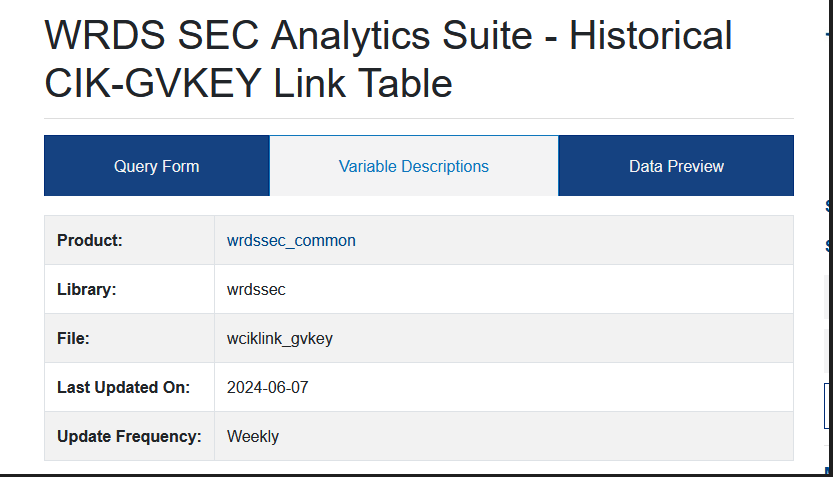

Use these to match the details here.

Below we get the tables based on the variable descriptions, even though it is not found directly by listing tables. (VS Code showing a subset)

In [50]:
conn.get_table(library='wrdssec', table='wciklink_gvkey', obs=2)

,cik,gvkey,source,link_desc,sec_company_name,link_company_name,sec_start_date,sec_end_date,link_start_date,link_end_date,...,n10q_a,ndef,n8k,nlet,n13d,n13g,n13f,ntot,ntot_nt,ntot_a
0,0000000003,None,No Link,No Link,DEFINED ASSET FUNDS MUNICIPAL INVT TR FD NEW YORK,None,1994-02-16,1998-07-09,None,None,...,0,0,0,0,0,0,0,7,7,1
1,0000000013,None,No Link,No Link,CORPORATE INCOME FUND SEVENTY NINTH SHORT TERM...,None,2014-02-10,2014-02-10,None,None,...,0,0,0,0,0,1,0,1,0,0


In [52]:
sec_cik_df =  conn.raw_sql(
            f"""
            select *
            from wrdssec.wciklink_gvkey sec
            where sec.gvkey in {concatenate_to_literal(us_gvkey)};
            """
) 

In [53]:
sec_cik_df.shape # get all ids for everything - and can use this to search each year as needed.

(8262, 25)

**Use the above to get the CIK key for the annual report**

Checked graph data is fine, so can start with graph analysis without concerns.

#### Concerns 

Ask about the limitations of data matches here.

What about the data that isn't matched here?}

Initial data investigation isn't correct, so you need to do the investigations again this week, and generate the features!!

Generate the graphs for further investigation this week, try not to waste too much time!!

Weekend, fix features to get all code and write up!!

#### To do 

Try to get the education tables in the morning, and then look at the LDA selection approach. Maybe windows download for that

Try LDA, and then get the R setup here as well!!

#### Steps

Try LDA to get it working, and R code

Create a separate notebook, for each year and educational backgrounds to start linking together.

And try the seeded LDA workflow - get it working in the Windows environment and if it is fine. Get the requirements.txt to get it working.

-- Finish in the above, linking IDs, and to get a feel of the data linking here, to do further analysis in the evening.

# Final Conclusion on data

Use the company network data, and get the complete data for everything from start to end year for analysis, in new notebook. And the bipartite approach, no need to use the individual network data from before.

Also try to get all the company ids for the SEK tables to get the annual reports as needed. 